In [44]:
#ML Training
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc, r2_score
from sklearn.svm import SVC


In [20]:
#Load in training set/test it out
df = pd.read_csv("all_team_data.csv")
df.head(8)

,Opponent,Date,Time,W/L,PTDIF,PF,PA,OVER,OFF,PASS,...,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV,SPEC,Year,Team
0,Nicholls,30-Aug,2:00pm,W,28,44.0,16.0,75.6,76.1,60.1,...,65.7,78.8,68.4,70.1,78.6,62.4,69.0,-,2014,air-force-falcons
1,Wyoming,6-Sep,10:15pm,L,-4,13.0,17.0,70.2,76.2,74.4,...,67.3,80.7,57.4,71.8,80.8,58.8,43.7,-,2014,air-force-falcons
2,Georgia State,13-Sep,2:00pm,W,10,48.0,38.0,69.8,74.2,90.8,...,55.2,69.4,61.3,66.5,55.1,63.0,55.8,-,2014,air-force-falcons
3,Boise State,27-Sep,6:00pm,W,14,28.0,14.0,71.6,61.8,45.0,...,51.1,71.5,74.9,80.7,76.3,59.9,80.5,-,2014,air-force-falcons
4,Navy,4-Oct,3:30pm,W,9,30.0,21.0,81.3,76.8,67.9,...,65.9,71.4,76.7,82.0,60.8,65.1,70.0,-,2014,air-force-falcons
5,Utah State,11-Oct,10:15pm,L,-18,16.0,34.0,63.9,53.7,47.0,...,49.0,55.9,75.4,88.0,80.0,63.8,68.7,-,2014,air-force-falcons
6,New Mexico,18-Oct,3:30pm,W,4,35.0,31.0,81.3,84.3,56.1,...,74.8,79.1,67.8,65.5,68.1,59.0,73.2,-,2014,air-force-falcons
7,Army,1-Nov,11:30am,W,17,23.0,6.0,84.4,80.3,79.1,...,66.8,73.1,79.0,77.3,81.5,77.6,69.7,-,2014,air-force-falcons


In [6]:
#Above we can see a sample of what the training set is like. In terms of what we want to train on, we're
#looking to predict the point differential (PTDIF) of a game using the various PFF grades from different aspects 
#of a game. For purposes of training here, we'll want to take the grade variables to use as training and negate the rest.

In [56]:
#Set up features/target variable
x = df.drop(['Opponent','Date','Time','W/L','PTDIF','OVER','PF','PA','SPEC','Year','Team'],axis=1)
y = df['PTDIF']

In [58]:
#Set up train/test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [60]:
#Linear regression model
lr = linear_model.LinearRegression()

0.5928808779409125
213.71146278950695


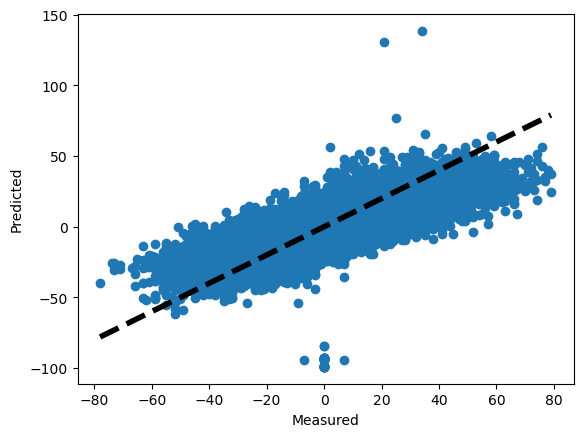

In [62]:
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(r2_score(y_test,lr_pred))
print(mean_squared_error(y_test,lr_pred))
#scores_lr = cross_val_score(lr,x_train,y_train,cv=10)
#print("Accuracy: %0.3f (+/- %0.3f)"%(scores_lr.mean(),scores_lr.std()*2))

predicted = cross_val_predict(lr,x,y,cv=10)
fig,ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [64]:
#Week 5 predictions
wk5 = pd.read_csv("pff_week5_colGrades.csv")

wk5_x = wk5[['OFF','PASS','PBLK','RECV','RUN','RBLK','DEF','RDEF','TACK','PRSH','COV']]
wk5_y = wk5['PTDIF']


In [66]:
pred5 = lr.predict(wk5_x)
wk5['PTDIF'] = pred5

In [68]:
wk5.head(8)

,Unnamed: 0,PTDIF,OFF,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV
0,Air Force,9.453533,64.6,51.9,28.8,50.0,63.0,76.9,74.9,74.8,56.8,78.1,63.0
1,Akron,-26.402154,53.1,56.7,50.1,55.6,71.7,38.7,52.9,56.7,31.6,69.6,34.0
2,Alabama,39.274706,80.0,89.1,70.7,77.1,79.4,60.2,91.6,91.4,72.0,73.5,91.6
3,Appalachian State,2.776187,66.7,56.5,72.6,65.3,79.5,56.2,71.0,71.3,53.8,74.1,59.8
4,Arizona,25.927777,79.8,90.1,77.4,71.0,80.1,59.8,75.6,71.7,57.8,75.1,79.7
5,Arizona State,14.489815,68.7,67.8,78.4,58.6,78.4,59.1,78.3,82.9,64.2,63.6,73.5
6,Arkansas,17.729889,80.9,78.2,64.2,71.2,88.8,69.8,71.9,82.3,55.4,63.1,61.8
7,Arkansas State,-10.268778,60.4,57.3,59.8,60.7,67.6,53.0,62.3,62.0,50.6,63.0,58.8


In [70]:
wk5.to_csv('wk5_powerRatings.csv')

In [72]:
#SVR Ratings
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
svr.fit(x_train,y_train)

SVR()

In [74]:
svr_pred = svr.predict(x_test)
print(r2_score(y_test,svr_pred))
print(mean_squared_error(y_test,svr_pred))

0.6857330744405294
164.97000688149413


In [82]:
svr5 = svr.predict(wk5_x)
wk5['PTDIF'] = svr5
wk5.to_csv('wk5_ratings_svr.csv')

In [84]:
wk5.head(8)

,Unnamed: 0,PTDIF,OFF,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV
0,Air Force,-0.908771,64.6,51.9,28.8,50.0,63.0,76.9,74.9,74.8,56.8,78.1,63.0
1,Akron,-23.831282,53.1,56.7,50.1,55.6,71.7,38.7,52.9,56.7,31.6,69.6,34.0
2,Alabama,39.573497,80.0,89.1,70.7,77.1,79.4,60.2,91.6,91.4,72.0,73.5,91.6
3,Appalachian State,6.289618,66.7,56.5,72.6,65.3,79.5,56.2,71.0,71.3,53.8,74.1,59.8
4,Arizona,30.720251,79.8,90.1,77.4,71.0,80.1,59.8,75.6,71.7,57.8,75.1,79.7
5,Arizona State,15.557301,68.7,67.8,78.4,58.6,78.4,59.1,78.3,82.9,64.2,63.6,73.5
6,Arkansas,24.275206,80.9,78.2,64.2,71.2,88.8,69.8,71.9,82.3,55.4,63.1,61.8
7,Arkansas State,-16.094326,60.4,57.3,59.8,60.7,67.6,53.0,62.3,62.0,50.6,63.0,58.8


In [86]:
#other methods!
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor()
knn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()

In [88]:
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [96]:
rf_p = rf.predict(x_test)
knn_p = knn.predict(x_test)
dtr_p = dtr.predict(x_test)

print(r2_score(y_test,rf_p))
print(r2_score(y_test,knn_p))
print(r2_score(y_test,dtr_p))
print(mean_squared_error(y_test,rf_p))
print(mean_squared_error(y_test,knn_p))
print(mean_squared_error(y_test,dtr_p))

0.6901923808466999
0.6296538449678685
0.3805066675451112
162.62915664024467
194.40801043705153
325.194320516504


In [92]:
rf5 = rf.predict(wk5_x)
wk5['PTDIF'] = rf5
wk5.to_csv('wk5_ratings_rf.csv')

In [94]:
knn5 = svr.predict(wk5_x)
wk5['PTDIF'] = knn5
wk5.to_csv('wk5_ratings_knn.csv')

In [ ]:
#Discared decision tree regressor given low score